# Exam 2 - solution

Submit this file to Canvas as a PDF or HTML before Sun Dec 8, 2024 at 5:00pm to earn +2 bonus points. Extended deadline Tue Dec 10, 2024 at 11:59 pm for +0 bonus points. 

* You are **not** permitted to discuss this exam with anyone besides the TA and professor. 
* You are welcome to use analytical and numerical computational tools (including generative AI like LLM); if you do, include the **commented** sourcecode (or prompts) in your submission.
* You are welcome to consult websites, textbooks, and other materials; if you do, include a full citation in your writeup (e.g. the .pdf and/or .html file).

This exam is worth a total of
**32 points.** 
Each subproblem is worth 2 points. Exams will be graded on a 0-1-2 grading scale: 0 for no attempt; 1 for an incorrect attempt; 2 for a correct attempt (with partially-correct attempts possibly receiving between 1 and 2). 

# problem 0 - [preferred name (first last)]; [preferred pronouns]
a. Approximately how many hours did you spend on this exam?

# problem 1 - state feedback (6 points)
Consider the following state space system: 
$$ \dot{x} = \begin{bmatrix}0 & 1 \\ 7 & -4 \end{bmatrix} x + 
\begin{bmatrix} 1 \\ 2 \end{bmatrix} u $$
$$ y = \begin{bmatrix} 1 & 3\end{bmatrix} x $$
where $x \in \mathbb{R}^2$ is the state, $u \in \mathbb{R}$ is the input, and $y \in \mathbb{R}$ is the output. 

## subproblem 1a

Using the full state feedback control law $u = -Kx$, derive the matrix $K$ that yields a closed-loop system with poles at $s = -1 + j$ and $s = -1 - j$. 



### solution 1a
Given the desired closed-loop poles, we derive the desired characteristic polynomial as: 
$$ a_d(s) = (s+i-j)(s+i+j) = s^2 + 2s + 2$$

Second, we derive the characteristic polynomial for the closed loop system with the control law $u = -Kx$.\
Substituting $u = -Kx$ into $\dot{x} = Ax + Bu$ yields $\dot{x} = (A-BK)x$, and so we must find the characteristic polynomial associated with the matrix $(A-BK)$ as a function of the yet-to-be-determined entries of $K$. 

$$ A = \begin{bmatrix}0 & 1 \\ 7 & -4 \end{bmatrix}, \quad 
B = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \quad
K = \begin{bmatrix} k_1 & k_2 \end{bmatrix}
$$

Thus, we obtain characteristic polynomial using $a(s) = det(sI-(A-BK))$: 
$$ a(s) = det \begin{bmatrix} s+k_1 & -1+k_2 \\ -7 + 2k_1 &  s+4+2k_2\end{bmatrix} = s^2 + (4+2k_2+k_1)s + (6k_1 + 7k_2 -7)$$

Matching coefficients between $a_d(s)$ and $a(s)$ yields:\
$$4+2k_2+k_1 = 2$$  $$6k_1 + 7k_2 -7 = 2$$
$$ \Rightarrow k_1 = \frac{32}{5}, \quad k_2 = -\frac{21}{5},\quad \fbox{$K = \begin{bmatrix} 6.4 & -4.2 \end{bmatrix}$}$$

### computational solution 1a
Or, if you did this computationally: 

In [1]:
from _447 import *
!pip install control
import control as ctrl

  Using cached control-0.10.1-py3-none-any.whl.metadata (7.6 kB)
Using cached control-0.10.1-py3-none-any.whl (549 kB)


In [2]:
A = np.array([[0, 1],[7, -4]])
B = np.array([[1],[2]])

K_mat = ctrl.place(A,B,[-1+1.j,-1-1.j])

print('K = ', K_mat)

K =  [[ 6.4 -4.2]]


## subproblem 1b
The system's closed loop step response can be simulated using a control input of $u = -Kx + r$, where $r$ is a unit step. That is, $r(t) = 1$ for all $t>0$.
Using the matrix $K$ you just derived, mathematically show that output $y$ of the closed-loop step response will settle at $y_{ss} = 13.5$. 
In other words, show that $y(t) = 13.5$ as $t \rightarrow \infty$. 

### solution 1b
**Note:** To earn full credit for this problem you must demonstrate the proper use of the equation $y_{ss} = -C \bar{A}^{-1} B + D$. It does not matter if you perform the calculations by hand or computationally. 

We can solve for the steady-state step response using $y_{ss} = -C \bar{A}^{-1} B + D$
where $\bar{A} = (A-BK)$. 

Using matrices $A, B, C, D, K$: 
$$ \dot{x} = \begin{bmatrix}0 & 1 \\ 7 & -4 \end{bmatrix} x + 
\begin{bmatrix} 1 \\ 2 \end{bmatrix} u $$
$$ y = \begin{bmatrix} 1 & 3\end{bmatrix} x $$


$$A = \begin{bmatrix}0 & 1 \\ 7 & -4 \end{bmatrix}, \quad 
B = \begin{bmatrix} 1 \\ 2 \end{bmatrix}, \quad
C = \begin{bmatrix} 1 & 3\end{bmatrix}, \quad
D = 0, \quad
K = \begin{bmatrix} 6.4 & -4.2 \end{bmatrix}$$

yields:
$$A-BK = \begin{bmatrix} -6.4 & 5.2 \\ -5.8 & 4.4 \end{bmatrix} $$

and therefore:

$$ y_{ss} = 
-\begin{bmatrix} 1 & 3\end{bmatrix}
\begin{bmatrix} -6.4 & 5.2 \\ -5.8 & 4.4 \end{bmatrix}^{-1}
\begin{bmatrix} 1 \\ 2 \end{bmatrix} + 0 = 
-\begin{bmatrix} 1 & 3\end{bmatrix} 
\begin{bmatrix} 2.2 & -2.6 \\ 2.9 & -3.2 \end{bmatrix}
\begin{bmatrix} 1 \\ 2 \end{bmatrix} = 13.5
$$

### computational solution 1b
Or, if you did this computationally: 

In [3]:
A = np.array([[0, 1],[7, -4]])
B = np.array([[1],[2]])
C = np.array([[1,3]])
D = np.array([[0]])
K = np.array([[6.4, -4.2]])

A_bar = A-B@K
y_ss = - C @ np.linalg.inv(A_bar) @ B + D
print('y_ss = ', y_ss)

y_ss =  [[13.5]]


## subproblem 1c
Implement a simulation which produces the closed-loop step response for this system. Use the same $K$ matrix you derived in *subproblem 1a*, and the same $A,B,C,D$ matrices given in the problem statement. Use control input $u = -Kx + r$ for this simulation. 

Produce one plot of $y(t)$ vs. $t$ where $y(t)= Cx(t)$ is the output of the system. Verify that your closed-loop step response has a steady-state value of $y_{ss} = 13.5$.\
**Note:** if you are using code from our class notebooks or previous assignments, double check that you are plotting the quantity $y(t)$. 

### solution 1c

Plugging the control law $u= -Kx + r$ into our state-space system, we arrive at: 

$$\dot{x} = Ax + B(-Kx + r) = (A-BK)x + Br $$
$$ y = Cx $$

steady-state output =  13.501


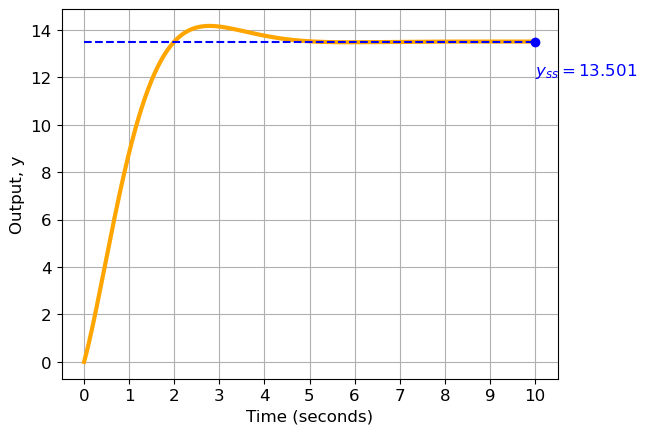

In [4]:
#### coding solution 1c - using Euler integration for simulation 

# Time parameters
dt = 0.01  # Time step
t_total = 10     # Total simulation time
N = int(t_total/dt) # Number of samples

# Input r = 1
r = np.array([np.ones(N)])

# define A, B, C, D, K matrices
A = np.array([[0, 1],[7, -4]])
B = np.array([[1],[2]])
C = np.array([[1, 3]])
K = np.array([[6.4, -4.2]])

A_bar = A-B@K

x0 = np.array([0,0])

def simulate_DE(A_mat, B_mat, C_mat, dt, x0, u):
  # Initialize state arrays: x = (y, y_dot)
    x = np.array([np.zeros(N),
                   np.zeros(N)])

    y = np.array([np.zeros(N)])

    # specify initial conditions 
    x[:,0] = x0
    y[:,0] = C_mat @ x[:,0]

  # Euler's method
    for i in range(1, N):
        # State vector 
        x_vec = x[:,i-1]
        
        # Reference vector
        u_vec = u[:,i-1]
        # print(u_vec)
        # print(B_mat @ u_vec)
        
        # Compute derivative of state vector
        dx_dt = A_mat @ x_vec + B_mat @ u_vec

        # Update state using Euler's method
        x_next = x_vec + dx_dt * dt

        # Store the results
        x[:,i] = x_next
        y[:,i] = C_mat @ x[:,i]
        
    return x, y

x_out, y_out = simulate_DE(A_bar, B, C, dt, x0, r)
t = np.linspace(0, t_total, N)

# find steady state value of y 
y_ss = y_out[0,-1]

print('steady-state output = ' , np.round(y_ss,3))

# Plot the results
ax = plt.subplot(1,1,1)
ax.plot(t, y_out[0],linewidth=3,color='orange')
ax.plot([0,10],[y_ss,y_ss],'b--')
ax.plot(10,y_ss,'bo')
ax.text(10,y_ss-1.4,'$y_{ss} = %0.3f$'%y_ss,color='blue')
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10])

plt.xlabel('Time (seconds)')
plt.ylabel('Output, y')
plt.grid()
plt.show()

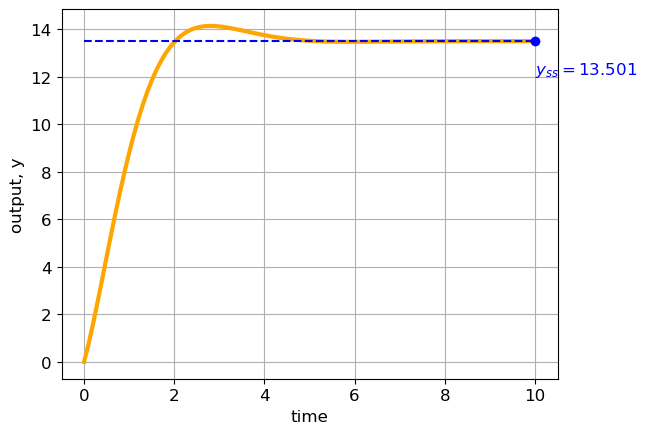

In [6]:
#### coding solution 1c - using Python Control Toolbox
# define A, B, C, D, K matrices
A = np.array([[0, 1],[7, -4]])
B = np.array([[1],[2]])
C = np.array([[1, 3]])
D = np.array([[0]])
K = np.array([[6.4, -4.2]])

A_bar = A-B@K

ss = ctrl.StateSpace(A_bar, B, C, D)
t,y = ctrl.step_response(ss, T=10)

y_ss = y[-1]

plt.plot(t,y,color='orange',linewidth=3)
plt.plot([0,10],[y_ss,y_ss],'b--')
plt.text(10,y_ss-1.4,'$y_{ss} = %0.3f$'%y_ss,color='blue');
plt.plot(10,y_ss,'bo')
plt.xlabel('time')
plt.ylabel('output, y')
plt.grid()
plt.show()

# problem 2 - root locus (6 points)

Consider the closed-loop feedback system with process $P(s)$ and proportional feedback gain $k>0 \in \mathbb{R}$ (as shown below). Each of the subsequent root locus plots depicts a different $P(s)$. For a given root locus plot, each trajectory originates at a filled colored circle. Trajectories either end at open circles or continue to infinity (indicated by the filled triangle). The arrows on each trajectory depict the direction of increasing $k$. For each root locus plot (2a, 2b, and 2c), you should report:

(i) The number of poles of $P(s)$\
(ii) The number of zeros of $P(s)$\
(iii) For sufficiently small values of $k$ (i.e., as $k \rightarrow 0$), is the closed-loop system stable or unstable?\
(iv) For sufficiently large values of $k$ (i.e., as $k \rightarrow \infty$), is the closed-loop system stable or unstable?

![problem2](exam2_figures/rlocus.png)

**Note:** These figures were generated using a colorblind-friendly pallete, but if you are having any difficulty distinguishing betweeh the different trajectories based on their color, please reach out to Prof. Ingraham and she will provide you with a version that includes different line styles. 

## solution 2a
(i) 3 poles\
(ii) 0 zeros\
(iii) stable\
(iv) unstable


## solution 2b
(i) 5 poles\
(ii) 2 zeros\
(iii) stable\
(iv) unstable

## solution 2c   
(i) 2 poles\
(ii) 2 zeros\
(iii) stable\
(iv) stable

# problem 3 - observer dynamics (8 points)

Consider the following block diagram that depicts an observer/estimator combined with full state feedback.

![problem3](exam2_figures/observer.png)

Process:
* $x \in \mathbb{R}^n$ is the process state (*i.e.* the true state)
* $y \in \mathbb{R}^m$ is the process output
* $u \in \mathbb{R}^p$ is the control signal (*i.e.* input to the process) 
* $A \in \mathbb{R}^{n \times n}, B \in \mathbb{R}^{n \times p},$ and $C \in \mathbb{R}^{m \times n}$ are the known matrices that describe the process dynamics

Controller:
* $\hat{x} \in \mathbb{R}^n$ is the estimator state
* $\hat{y} \in \mathbb{R}^m$ is the estimator output
* $L \in \mathbb{R}^{n \times m}$ is the output injection matrix
* $K \in \mathbb{R}^{p \times n}$ is the state feedback matrix

In class (Week 6), we derived the augmented matrix $\bar{A}$ ("A bar") that encodes the closed-loop dynamics of the combined system when we choose augmented state $\bar{x} = \begin{bmatrix}x \\ e \end{bmatrix}$, where $e = x-\hat{x}$ is the error between process state and estimator state. We found that the dynamics of the augmented state $ \dot{\bar{x}} = \bar{A}\bar{x}$ could be written as: 
$$\dot{\bar{x}} =
\begin{bmatrix} \dot{x} \\ \dot{e} \end{bmatrix} =
\begin{bmatrix} (A - B K) & B K \\ 0 & (A - L C) \end{bmatrix}
\begin{bmatrix} x \\ e \end{bmatrix}
$$

where 

$$ \bar{A} = \begin{bmatrix} (A - B K) & B K \\ 0 & (A - L C) \end{bmatrix}$$


## subproblem 3a

Derive the augmented matrix $\tilde{A}$ ("A tilde") that describes the dynamics of the closed loop system when we choose a different augmented state $\tilde{x} = \begin{bmatrix}x \\ \hat{x} \end{bmatrix}$. In other words, find $\tilde{A}$ such that: 
$$ \dot{\tilde{x}} = \tilde{A}\tilde{x}$$
Your matrix $\tilde{A}$ should have entries composed of $A, B, C, L,$ and $K$ matrices. 

### solution 3a
First, substitute $ u = -K\hat{x} $ into the process equation:
$$ \dot{x} = A x + B u = A x - B K \hat{x}$$

Next, plug in $u = -K\hat{x}, y = Cx,$ and $\hat{y} = C\hat{x}$ into the estimator equation and combine terms: 
$$ \dot{\hat{x}} = A \hat{x} + B u + L C (x - \hat{x}) = \dot{\hat{x}} = (A - B K - L C)\hat{x} + L C x $$

Combine the dynamics for $x$ and $\hat{x}$:
$$ \begin{bmatrix} \dot{x} \\ \dot{\hat{x}} \end{bmatrix} =
\begin{bmatrix} A & -B K \\ L C & A - B K - L C \end{bmatrix}
\begin{bmatrix} x \\ \hat{x}
\end{bmatrix}$$

Thus, the augmented matrix $\tilde{A}$ is:
$$\tilde{A} = 
\begin{bmatrix} 
A & -B K \\ 
L C & A - B K - L C 
\end{bmatrix}
$$

## subproblem 3b
By choosing a different state vector in this way, you have just achieved a ***change of basis***. Derive the matrix $P$ that transforms $\bar{x} = \begin{bmatrix} x \\ e \end{bmatrix}$ into $\tilde{x} = \begin{bmatrix} x \\ \hat{x} \end{bmatrix}$. In other words, find $P$ such that: 
$$ \tilde{x} = P \bar{x}$$ 


### solution 3b
Using the definition $e = x - \hat{x}$ we can rewrite the state vector $\tilde{x}$ as: 

$$ \tilde{x} = \begin{bmatrix} x \\ \hat{x} \end{bmatrix} = \begin{bmatrix} x \\ x - e \end{bmatrix}$$

Thus, 
$$ \tilde{x} = \begin{bmatrix} x \\ x - e \end{bmatrix} = P \bar{x} = 
\begin{bmatrix} P_{11} & P_{12} \\ P_{21} & P_{22} \end{bmatrix} 
\begin{bmatrix} x \\ e \end{bmatrix} $$

Solving the system of linear equations yields: 
$$ x = P_{11}x + P_{12}e = I^{n \times n} x + 0 e$$ 
$$ x - e = P_{21}x + P_{22}e = I^{n \times n} x - I^{n \times n} e $$ 

Which means $P =\begin{bmatrix} I^{n \times n} & 0 \\ I^{n \times n} & - I^{n \times n} \end{bmatrix}$

**Remember:** $x$ and $e$ are $n$-dimensional vectors, so the entries of $P$ should be $n \times n$ identity matrices and $0$ is the $n \times n$ matrix of all zeros.  No points will be deducted for the answer $P =\begin{bmatrix} 1 & 0 \\ 1 & -1 \end{bmatrix}$


## subproblem 3c
You have been provided a code skeleton below with example $A, B, C, L, K$ matrices, and $\bar{A}$ already defined. Computationally (i.e., using the code below):\
(i) show that $\tilde{A} = P\bar{A} P^{-1}  \quad $ (*i.e.* $\bar{A}$ and $\tilde{A}$ are **similar**)\
(ii) find the eigenvalues of $\bar{A}$ and $\tilde{A}$

### derivation for solution 3c (not required for credit)
If you are curious about the derivation of *subproblem 3c(i)*: 
We know we have a linear system defined by $$\dot{\bar{x}} = \bar{A}\bar{x} \qquad (1)$$
We also know from *subproblem 3b* that
$$\tilde{x} = P \bar{x} \quad \Rightarrow \quad \bar{x} = P^{-1} \tilde{x} \qquad (2) $$
Taking the derivative of this expressions yields
$$\dot{\bar{x}} = P^{-1} \dot{\tilde{x}} \qquad (3)$$
Combining (1), (2), (3) yields
$$ P^{-1} \dot{\tilde{x}} = \bar{A} P^{-1} \tilde{x} $$
Left multiplying both sides by $P$: 
$$ \dot{\tilde{x}} = P \bar{A} P^{-1} \tilde{x} = \tilde{A} \tilde{x} $$
Thus
$$ \tilde{A} = P \bar{A} P^{-1}$$



### Run this cell first: 

In [10]:
np.set_printoptions(precision=3)

# A, B, C, K, L given (do not edit)
A = np.array([[0, 1],[39, -1]])
B = np.array([[0],[4]]) 
C = np.array([[0.25, 0]]) 
K = np.array([[10, 0.1]]) 
L = np.array([[33],[203]]) 

# A_bar defined for you (from class) 
A_bar = np.zeros([4,4])
A_bar[0:2,0:2] = A-(B@K)
A_bar[0:2,2:4] = B@K
A_bar[2:4,2:4] = A-(L@C)

### solution 3c

In [11]:
# Define A_tilde (from subproblem 3a) here: 
A_tilde = np.zeros([4,4])
A_tilde[0:2,0:2] = A
A_tilde[0:2,2:4] = -B@K
A_tilde[2:4,0:2] = L@C
A_tilde[2:4,2:4] = A-(L@C)-(B@K)

# Define P (from subproblem 3b) here:
P = np.zeros([4,4])
P[0:2,0:2] = np.identity(2)
P[0:2,2:4] = np.zeros((2,2))
P[2:4,0:2] = np.identity(2)
P[2:4,2:4] = -np.identity(2)

# subproblem 3c (i): 
A_tilde2 =  P @ A_bar @ np.linalg.inv(P)

# subproblem 3c (ii): determine the eigenvalues of A_bar and A_tilde 
eig_A_bar = np.linalg.eigvals(A_bar)
eig_A_tilde = np.linalg.eigvals(A_tilde)

### Run the cell to display your answers: 

In [12]:
# formatting to display answer (do not edit): 
print('subproblem 3c(i):')
print('A_tilde =')
print(A_tilde)
print('')
print('A_tilde2 = P^-1 * A_bar * P = ')
print(A_tilde2)
print('')
print('subproblem 3c(ii):')
print('eig(A_bar) =', np.round(eig_A_bar[0],3), np.round(eig_A_bar[1],3), np.round(eig_A_bar[2],3), np.round(eig_A_bar[3],3))
print('eig(A_tilde) =', np.round(eig_A_tilde[0],3), np.round(eig_A_tilde[1],3), np.round(eig_A_tilde[2],3), np.round(eig_A_tilde[3],3))

subproblem 3c(i):
A_tilde =
[[  0.     1.     0.     0.  ]
 [ 39.    -1.   -40.    -0.4 ]
 [  8.25   0.    -8.25   1.  ]
 [ 50.75   0.   -51.75  -1.4 ]]

A_tilde2 = P^-1 * A_bar * P = 
[[  0.     1.     0.     0.  ]
 [ 39.    -1.   -40.    -0.4 ]
 [  8.25   0.    -8.25   1.  ]
 [ 50.75   0.   -51.75  -1.4 ]]

subproblem 3c(ii):
eig(A_bar) = (-0.7+0.714j) (-0.7-0.714j) (-5.804+0j) (-3.446+0j)
eig(A_tilde) = (-5.804+0j) (-3.446+0j) (-0.7+0.714j) (-0.7-0.714j)


## subproblem 3d

Based on what you observed in *subproblem 3c*, would you conclude that changing the state vector from $\bar{x} = \begin{bmatrix} x \\ e \end{bmatrix}$ to $\tilde{x} = \begin{bmatrix} x \\ \hat{x} \end{bmatrix}$ changes the stability of the closed-loop system? Explain your reasoning. 

### solution 3d
We determined that matrices $\bar{A}$ and $\tilde{A}$ are similar through the change-of-basis matrix $P$. Consequently, the eigenvalues of $\bar{A}$ and $\tilde{A}$ are the same. Therefore, we would conclude that the stability of the closed-loop system is **not** changed as a result of this change of basis.\
**Not required for full credit:** All the eigenvalues have negative real part, and thus the closed-loop system is stable.

# problem 4 - bode and nyquist plots (4 points)

## subproblem 4a
Examine the Bode plot below for $L(s) = K\cdot G(s)$, where $K$ is the feedback gain and $G(s)$ is the process transfer function. In this plot, $K=1$. From these plots, identify: \
(i) the system's gain margin $g_m$ (report this in absolute magnitude, not in dB)\
(ii) the frequency $\omega_g$ that corresponds to the gain margin\
(iii) the system's phase margin $\varphi_m$\
(iv) the frequency $\omega_\varphi$ that corresponds to the phase margin

Approximate your answers using the nearest visible gridlines. 

![problem4a](exam2_figures/bodeplot.png)


### solution 4a 
The gain margin $g_m$ is defined as the reciprocal of $|L(j\omega_g)|$, where $\omega_g$ is the frequency at which $\angle L(j\omega)|$ crosses $-180 \degree.$ From the Bode plot, we ascertain that the phase of $L(j\omega)$ crosses $180 \degree$ at $\omega_g = 3 \frac{rad}{sec}$. At that frequency, the magnitude of $L(j\omega)$ is approximately $0.3$. Therefore, $g_m = 1/0.3 = 3.3$. 

(i) $g_m = 3.3$\
(ii) $\omega_g = 3 \frac{rad}{sec}$

The phase margin $\varphi_m$ is defined as the distance from $\angle L(j\omega_\varphi)|$ to $-180 \degree$, where $\omega_\varphi$ is the frequency at which $|L(j\omega)|$ crosses $1$. From the Bode plot, we see that the magnitude of $L(j\omega)$ crosses $1$ at approximately $\omega_\varphi = 0.7 \frac{rad}{sec}$. At this frequency, the phase of $L(j\omega)$ is approximately $-45 \degree$. The difference between $-180 \degree$ and $-45 \degree$ is $135 \degree$. Because the Nyquist plot is symmetrical about the real axis, shifting the phase by either $135 \degree$ or $-135 \degree$ accomplishes the same thing. 

(iii) $\varphi_m = 135 \degree$\
(iv) $\omega_\varphi = 0.7 \frac{rad}{sec}$

## subproblem 4b
The Nyquist plot for the same system $L(s) = K\cdot G(s)$ is shown below. Based on your analysis from *subproblem 4a* and looking at the Nyquist plot, for what range of $K > 0$ is the closed-loop system stable? 

![problem4b](exam2_figures/nyquist.png)


### solution 4b

We determined the gain margin $g_m = 3.3$. The Nyquist plot shows us that if we increase $K = 3.3$, the Nyquist plot will intersect $-1$, and thus the closed-system will be unstable. If we increase $K > 3.3$, now the Nyquist plot will encircle $-1$, and the closed-loop system will be unstable. Based on the calculated gain margin and the shape of this Nyquist plot, the range of $K$ to ensure closed-loop system stability is $0 < K < 3.3$.

# problem 5 - frequency domain design (8 points)
You have just started working for an industrial robotics company and joined the team working on a "pick-and-place" robotic arm. This robot arm has to pick up products on one conveyor belt and move them to another. The robot moves back and forth between belts tracking a sinusoidal trajectory with a frequency of $0.7$ rad/s (approximately $0.1$ Hz). You were given the feedback control architecture in the following diagram:

![problem5](exam2_figures/feedback.png)

where $r$ is the reference trajectory (desired position of the robot arm), $y$ is the output (measured position of the robot arm), $u$ is the control signal, $e$ is the error between reference and output, $v$ is the input disturbance, and $w$ is the output disturbance. You were also given the following models for the process $P(s)$ and controller $C(s)$: 
$$ P(s) = \frac{1}{(s+1)^2} \qquad C(s) = 6 + 0.5\frac{1}{s}$$

For all subsequent subproblems, back up your answers with plots and/or mathematical calculations. You may use any computational tools you like to help you solve this problem. 
**Note:** Please pay attention to your units when solving this problem: frequency (rad/s vs. Hz), phase (rad vs. deg) and magnitude (log magnitude vs. dB). 

## subproblem 5a
You have been asked to verify the performance specifications for this robot to confirm they meet the company standards. For tracking the desired reference trajectory of $r(t) = \sin(\omega t)$, where $\omega=0.7$ rad/s, does the current closed-loop system's steady-state output $y(t)$ meet the following specifications? Assume there are no disturbances (i.e., $v=0$ and $w=0$). 

* the magnitude of $y(t)$ is within $90\%$ of the magnitude of $r(t)$
* the phase of $y(t)$ is within $15 \deg$ of the phase of $r(t)$

Back up your answer with plots and/or mathematical calculations.

### solution 5a
There are several ways you could go about solving this problem. No matter which option you choose, you first must derive the transfer function $G_{yr}$ from reference $r(t)$ to output $y(t)$. We know from class that $G_{yr} = \cfrac{PC}{1+PC}$. 

By hand: 
$$ G_{yr} = \frac{\left( \frac{1}{(s+1)^2} \right) \left( 6 + 0.5 \frac{1}{s} \right) }{1+\left( \frac{1}{(s+1)^2} \right) \left( 6 + 0.5 \frac{1}{s} \right)} = 
\frac{12s + 1} {2s^3 + 4s^2 + 14s + 1} $$

With code: 

In [6]:
s = sym.symbols('s')
P = 1/(s+1)**2 
C = 6 + 0.5/s
Gyr_sym = (P*C) / (1+P*C)
sym.simplify(sym.expand(Gyr_sym))

         6.0⋅s + 0.5         
─────────────────────────────
     3        2              
1.0⋅s  + 2.0⋅s  + 7.0⋅s + 0.5

Next, you could generate a Bode plot for the system and zoom way in on your region of interest:

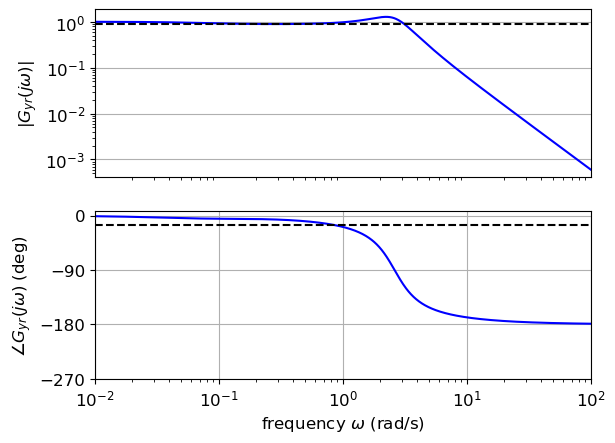

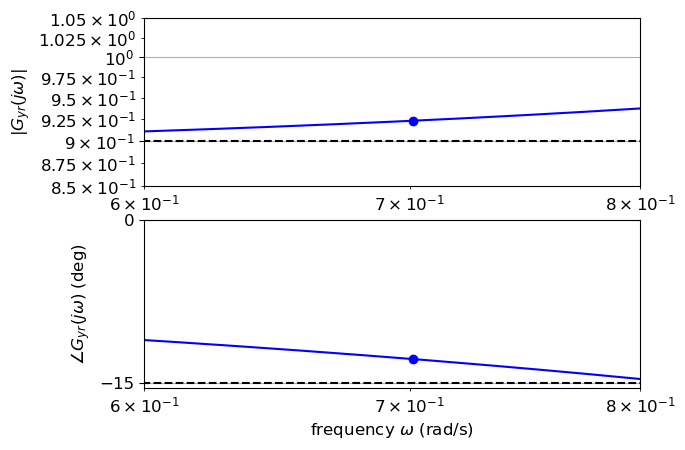

In [46]:
Gyr = lambda s : (6*s + 0.5) / (s**3 + 2*s**2 + 7*s + 0.5)

omega = np.logspace(-2,2,1000) # plot x-axis in Hz, not rad/s
xlim = omega[[0,-1]]

abs_Gyr = np.abs(Gyr(1.j*omega)) # find magnitude of 
angle_Gyr = np.unwrap(np.angle(Gyr(1.j*omega)))*180./np.pi

plt.figure(); axs = []
ax = plt.subplot(2,1,1); ax.grid('on')
ax.loglog(omega,abs_Gyr,'b-')
ax.loglog(omega,0.9*np.ones_like(omega),'k--')
ax.set_ylabel(r'$|G_{yr}(j\omega)|$')
ax.set_xticks([])
ax.set_xlim(xlim)
axs.append(ax)

ax = plt.subplot(2,1,2); ax.grid('on')
ax.semilogx(omega,angle_Gyr,'b-')
ax.semilogx(omega,-15*np.ones_like(omega),'k--')
ax.set_xlabel('frequency $\omega$ (rad/s)')
ax.set_ylabel(r'$\angle G_{yr}(j\omega)$ (deg)')
ax.set_yticks([0, -90,-180,-270])
ax.set_xlim(xlim)
axs.append(ax)

## Zoom way in: 
omg_crit = np.argmin(np.abs(omega - 0.7)) # find index where omega is closest to 0.7
plt.figure(); axs = []
ax = plt.subplot(2,1,1); ax.grid('on')
ax.loglog(omega,abs_Gyr,'b-')
ax.loglog(omega[omg_crit],abs_Gyr[omg_crit],'bo')
ax.set_ylabel(r'$|G_{yr}(j\omega)|$')
ax.loglog(omega,0.9*np.ones_like(omega),'k--')
ax.set_yticks([1, 0.9])
ax.set_xlim(0.6, 0.8)
ax.set_ylim(0.85, 1.05)
axs.append(ax)

ax = plt.subplot(2,1,2); ax.grid('on')
ax.semilogx(omega,angle_Gyr,'b-')
ax.set_xlabel('frequency $\omega$ (rad/s)')
ax.set_ylabel(r'$\angle G_{yr}(j\omega)$ (deg)')
ax.semilogx(omega,-15*np.ones_like(omega),'k--')
ax.semilogx(omega[omg_crit],angle_Gyr[omg_crit],'bo')
ax.set_yticks([0, -15])
ax.set_xlim(0.6, 0.8)
ax.set_ylim(-15.5,0)
axs.append(ax)

You could also analytically calculate the magnitude and phase of $G{yr}$ at $0.7$ rad/s:

In [145]:
Gyr = lambda s : (6*s + 0.5) / (s**3 + 2*s**2 + 7*s + 0.5)
w = 0.7 # desired frequency in  rad/s
abs_Gyr_w = np.abs(Gyr(1.j*w))
phase_Gyr_w = np.angle(Gyr(1.j*w))*180./np.pi
print('magnitude of Gyr at 0.7 rad/s = ' , round(abs_Gyr_w,3))
print('phase of Gyr at 0.7 rad/s = ' , round(phase_Gyr_w,3) ,'deg')

magnitude of Gyr at 0.7 rad/s =  0.923
phase of Gyr at 0.7 rad/s =  -12.802 deg


No matter the approach you took, you should conclude that yes, our system meets its tracking specfications.\
**Note:** You do not need both the Bode plot and the mathematical calculations to earn full credit, you just have to be able to back up your answer using some combination of plots and/or math. 

## subproblem 5b
Simulate the steady-state output of your closed-loop system, $y(t)$ in response to reference input $r(t) = \sin(\omega t)$, where $\omega=0.7$ rad/s. Assume no disturbances (i.e., $v=0$, $w=0$). Produce a one plot that depicts both $y(t)$ vs. $t$ and $r(t)$ vs. $t$ for $50$ seconds for the closed-loop system. 

### solution 5b

First, let's confirm stability (yes, all real parts of eigenvalues are negative!) (**Not required**)

In [154]:
den = [1, 2, 7, 0.5] # coefficients of characteristic polynomial of Gyr
eigenvals = np.roots(den)
eigenvals

array([-0.964+2.435j, -0.964-2.435j, -0.073+0.j   ])

We know that a stable LTI system produces a scaled and shifted version of the original sinusoid at steady-state. If $r(t) = \sin(\omega t)$, we know steady-state $y(t) = |G_{yr}(j\omega)| \sin(\omega t + \angle G(j\omega))$

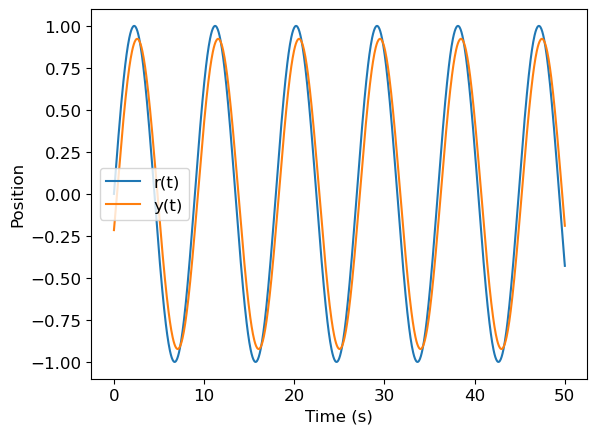

In [162]:
T = np.linspace(0,50,1000)
r = np.sin(0.7*T) # reference
y = abs_Gyr_w*np.sin(0.7*T + phase_Gyr_w) # steady-state output y is scaled by magnitude of Gyr and shifted by phase of Gyr: 

plt.figure();
ax = plt.subplot(1,1,1);
ax.plot(T,r)
ax.plot(T,y)
ax.legend(['r(t)','y(t)'])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position');

If you did not recognize that you could just scale and shift $r(t)$ you could have employed the same method from HW1, Problem 3. You would first decomopose $r(t)$ into a sum of complex exponentials: 

$$r(t) = \sin(0.7t) = \frac{1}{2j}e^{0.7j t} - \frac{1}{2j}e^{-0.7j t}$$

Then we know $y(t) = G_{yr}(j \omega) e^{j \omega t}$, so: 

$$y(t) = G_{yr}(0.7 j) \frac{1}{2j}e^{0.7j t} - G_{yr}(-0.7 j)\frac{1}{2j}e^{-0.7j t}$$

$$y(t) = \frac{6(0.7j) + 0.5}{(0.7j)^3 + 2(0.7j)^2 + 7(0.7j) + 0.5} * \frac{1}{2j}e^{0.7j t} - \frac{6(-0.7j) + 0.5}{(-0.7j)^3 + 2(-0.7j)^2 + 7(-0.7j) + 0.5} * \frac{1}{2j}e^{-0.7j t}$$

Plotting this yields the same result as above! 

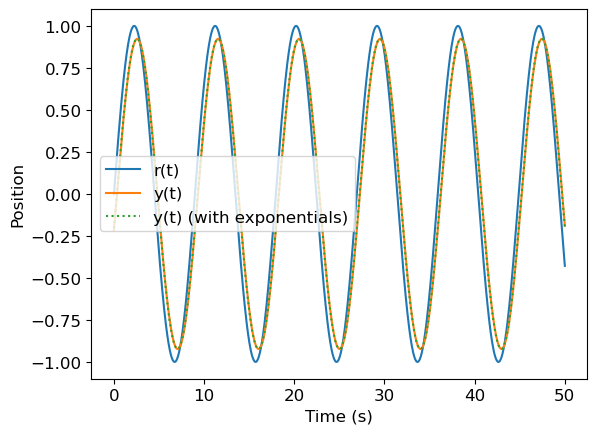

In [163]:
### Or, if you did this the long way (like we did in HW1)
w = 0.7*1.j

# decompose sin(wt) into sum of complex exponentials, and multiply each term by Gyr(jw): 
y_1st = ((6*w + 0.5)/(w**3 + 2*w**2 + 7*w + 0.5)) * (np.exp(w*T)/(2*1.j)) # first term
y_2nd = ((6*(-w) + 0.5)/((-w)**3 + 2*(-w)**2 + 7*(-w) + 0.5)) * -np.exp(-w*T)/(2*1.j) # second term
y_exp = y_1st + y_2nd

plt.figure();
ax = plt.subplot(1,1,1);
ax.plot(T,r)
ax.plot(T,y) # recognizing that y(t) is scaled and shifted r(t)
ax.plot(T,y_exp,':') # technique from HW1 
ax.legend(['r(t)','y(t)','y(t) (with exponentials)']);
ax.set_xlabel('Time (s)')
ax.set_ylabel('Position');

## subproblem 5c 
You know that the encoder that measures the robot's joint position is subject to electrical noise at a frequency of 60 Hz. You decide to dig deeper into the effect of this output disturbance (i.e. sensor noise) $w$ on the robot's output position $y$. Within this closed-loop feedback system, will this output disturbance signal $w$ be attenuated, sustained, or amplified? Back up your answer with plots and/or mathematical calculations.

### solution 5c
We derived the transfer function from $w$ to $y$ in class as $G_{yw} = \frac{1}{1+PC}$. Evaluating this transfer function using our given $P(s)$ and $C(s)$ yields: 

In [148]:
s = sym.symbols('s')
P = 1/(s+1)**2 
C = 6 + 0.5/s
Gyw_sym = 1 / (1+P*C)
sym.simplify(sym.expand(Gyw_sym))

     ⎛     2              ⎞  
   s⋅⎝1.0⋅s  + 2.0⋅s + 1.0⎠  
─────────────────────────────
     3        2              
1.0⋅s  + 2.0⋅s  + 7.0⋅s + 0.5

Next, we are interested in the magnitude of this transfer function if the frequency of our input signal $w = 60$ Hz. We convert $60$ Hz to rad/s by multiplying by $2\pi$, and then calculate the magnitude of transfer function $G_{yw}$ at that frequency:

In [52]:
Gyw = lambda s : s*(s**2 + 2*s + 1) / (s**3 + 2*s**2 + 7*s + 0.5)

w = 60*2*np.pi # desired frequency in  rad/s
abs_Gyw_w = np.abs(Gyw(1.j*w))
phase_Gyw_w = np.angle(Gyw(1.j*w))*180./np.pi
print('magnitude of Gyw at 60 Hz (377 rad/s) = ' , round(abs_Gyw_w,3))
print('phase of Gyw at 60 Hz (377 rad/s) = ' , round(phase_Gyw_w,3) ,'deg')

magnitude of Gyw at 60 Hz (377 rad/s) =  1.0
phase of Gyw at 60 Hz (377 rad/s) =  0.0 deg


We can qualitatively observe the same information from the Bode plot: 

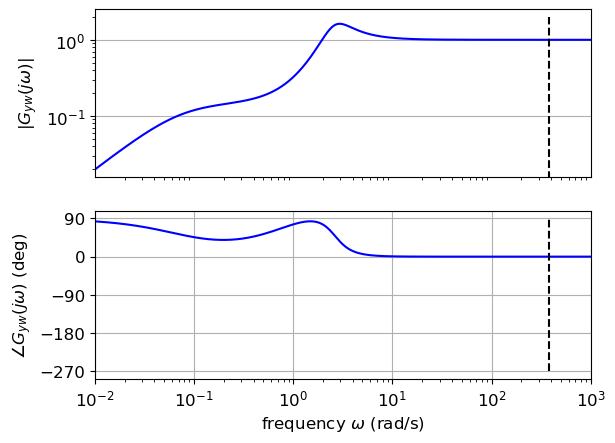

In [60]:
omega = np.logspace(-2,3,1000) # plot x-axis in Hz, not rad/s
xlim = omega[[0,-1]]

abs_Gyw = np.abs(Gyw(1.j*omega)) # find magnitude of 
angle_Gyw = np.unwrap(np.angle(Gyw(1.j*omega)))*180./np.pi

plt.figure(); axs = []
ax = plt.subplot(2,1,1); ax.grid('on')
ax.loglog(omega,abs_Gyw,'b-')
ax.semilogx([60*2*np.pi,60*2*np.pi],[-0.001,2],'k--')
ax.set_ylabel(r'$|G_{yw}(j\omega)|$')
ax.set_xticks([])
ax.set_xlim(xlim)
axs.append(ax)

ax = plt.subplot(2,1,2); ax.grid('on')
ax.semilogx(omega,angle_Gyw,'b-')
ax.semilogx([60*2*np.pi,60*2*np.pi],[-270,90],'k--')
ax.set_xlabel('frequency $\omega$ (rad/s)')
ax.set_ylabel(r'$\angle G_{yw}(j\omega)$ (deg)')
ax.set_yticks([90, 0, -90,-180,-270])
ax.set_xlim(xlim)
axs.append(ax)


Therefore we conclude that the output disturbance signal $w$ will be sustained in the closed-loop system, and show up unchanged in our final system output $y(t)$.\
**Note:** You do not need both the Bode plot and the mathematical calculations to earn full credit, you just have to be able to back up your answer using some combination of plots and/or math. 

## subproblem 5d
You are also interested in what happens when the robot picks up objects of different masses, and how this affects the robot's output position $y$. Picking up an object of a different mass can be modeled as a constant input disturbance $v$. Within this closed-loop feedback system, will this input disturbance signal $v$ be attenuated, sustained, or amplified? Back up your answer with plots and/or mathematical calculations.

### solution 5d
We derived the transfer function from $v$ to $y$ in class as $G_{yv} = \frac{P}{1+PC}$. Evaluating this transfer function using our given $P(s)$ and $C(s)$ yields:


In [150]:
s = sym.symbols('s')
P = 1/(s+1)**2 
C = 6 + 0.5/s
Gyw_sym = P / (1+P*C)
sym.simplify(sym.expand(Gyw_sym))

            1.0⋅s            
─────────────────────────────
     3        2              
1.0⋅s  + 2.0⋅s  + 7.0⋅s + 0.5

In [151]:
Gyv = lambda s : s / (s**3 + 2*s**2 + 7*s + 0.5)
w = 0 # desired frequency in  rad/s
abs_Gyw_w = np.abs(Gyw(1.j*w))
phase_Gyw_w = np.angle(Gyw(1.j*w))*180./np.pi
print('magnitude of Gyw at 60 Hz (377 rad/s) = ' , round(abs_Gyw_w,3))
print('phase of Gyw at 60 Hz (377 rad/s) = ' , round(phase_Gyw_w,3) ,'deg')

magnitude of Gyw at 60 Hz (377 rad/s) =  0.0
phase of Gyw at 60 Hz (377 rad/s) =  0.0 deg


We can see that evaluating $G_{yv}(s) = G_{yv}(j\omega) = G_{yv}(0) = 0$. Therefore, the constant input disturbance is attenuated (actually, eliminated!). This is not surprising since we are using a PI controller, and we showed in Week 1 that using a PI controller can eliminate the effect of constant input disturbances, and greatly attenuate those at low frequenciues. 